In [ ]:
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
 -- Hypotheses0 Network latency has stayed the same or has gone down since switching
 -- Alt Hypothesis network latency has gone up since switching

 -- True Positive -- low p-value , reject the Ho, -- latency has gone up
 -- False Positive -- low p-value, reject the Ho, -- sample size with generally high latency due to various reasons such as multiple people or time of day
 -- True Negative -- high p-value, fail to reject Ho -- latency has gone up
 -- False Negative -- high p-value, fail to reject Ho -- sample size latency is not higher due to service type



Is the website redesign any good?
-- Null Hypothesis -- the redesigned website draws more traffic than previous version
-- alt Hypothesis -- the redesigned website draws less or same amout of traffic than previous version

-- True Positive -- low p-value , reject the Ho, -- the new website does not draw more traffic
 -- False Positive -- low p-value, reject the Ho, -- sample size was during a holiday and did not account for the fall in overall traffic
 -- True Negative -- high p-value, fail to reject Ho -- the webiste draws more traffic
 -- False Negative -- high p-value, fail to reject Ho -- sample size was included set during a marketing campaign for that day



Is our television ad driving more sales?
-- Null H - The television ad did not affect sales or stayed the same 
-- Alt H - The television ad drove more sales

 --True Positive -- low p-value , reject the Ho, -- Television sales increased
 -- False Positive -- low p-value, reject the Ho, -- the occurred during black friday and overall sales were higher
 -- True Negative -- high p-value, fail to reject Ho -- Ad had no effect no sales
 -- False Negative -- high p-value, fail to reject Ho -- Ad was not marketed to the right audience or the right time

In [1]:
stats.ttest_ind_from_stats()

NameError: name 'stats' is not defined

In [12]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from math import sqrt
from scipy import stats


In [10]:
df = pd.read_csv('telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

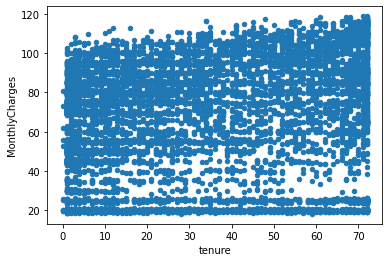

In [11]:
df.plot.scatter(y='MonthlyCharges', x='tenure')

In [39]:
x = df.tenure
y = df.MonthlyCharges


In [20]:
# H/0 : There is no linear correlation between tenure and monthly charges.
# H/a : There is a linear relationship between tenure and monthly charges. 

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

There does not appear to be a linear relation ship between tenure and monthly charges. 

In [36]:
x = df.tenure
y = df.TotalCharges
x

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [33]:
y = pd.to_numeric(y, errors='coerce')
y

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [40]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

There does not appear to be a linear relation ship between tenure and monthly charges. 

In [45]:
yes_phone = df[df.PhoneService == 'Yes']
no_phone = df[df.PhoneService == 'No']

In [50]:
r, p = stats.pearsonr(yes_phone.tenure, yes_phone.MonthlyCharges)
r, p

(0.24538898585363203, 7.117871077928422e-88)

In [52]:
r, p = stats.pearsonr(no_phone.tenure, no_phone.MonthlyCharges)
r, p

(0.5857597986661374, 4.6033703473404816e-64)

In [51]:
fiber = df[df.InternetService == 'Fiber optic']
dsl = df[df.InternetService == 'DSL']

In [53]:
r, p = stats.pearsonr(fiber.tenure, fiber.MonthlyCharges)
r, p

(0.6246206176175604, 0.0)

In [54]:
r, p = stats.pearsonr(dsl.tenure, dsl.MonthlyCharges)
r, p

(0.517282819660249, 8.360426862284633e-166)

## 2. Use the employees database

### Is there a relationship between how long an employee has been with the company and their salary?

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

## 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [58]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [60]:
r, p = stats.pearsonr(sleep.Days , sleep.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)